In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
model_data = pd.read_csv('ModelReadyZillow.csv')

In [36]:
X = model_data.drop(['logerror', 'parcelid', 'month', 'year'], axis=1)
y = model_data['logerror']

#### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=100)

In [39]:
rfreg.fit(X_train, y_train)
prediction = rfreg.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction)

0.07579318585946694

#### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators': [100,200],
                'min_samples_leaf': [1],
                'max_depth': [2,5],
                'n_jobs': [-1],
             }

grid_obj = GridSearchCV(rfreg, parameters, cv=5, scoring='neg_mean_absolute_error')
grid_obj.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200], 'min_samples_leaf': [1], 'max_depth': [2, 5], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [45]:
grid_obj.best_score_

-0.0677045262111744

In [46]:
grid_obj.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100, 'n_jobs': -1}

## Gradient Boost

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gbreg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

In [47]:
gbreg.fit(X_train, y_train)
gbreg_predict = gbreg.predict(X_test)

In [48]:
mean_absolute_error(y_test, gbreg_predict)

0.07019567578240503

#### Hyperparameter Tuning

In [49]:
param_grid={'n_estimators':[100,300],
            'learning_rate': [0.05, 0.01],# 0.02, 0.01], 
            'max_depth':[3,5],
           } 
gb_obj = GridSearchCV(gbreg, param_grid, cv=5, scoring='neg_mean_absolute_error')
gb_obj.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 300], 'learning_rate': [0.05, 0.01], 'max_depth': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [50]:
gb_obj.best_score_

-0.06760005965194708

In [51]:
gb_obj.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

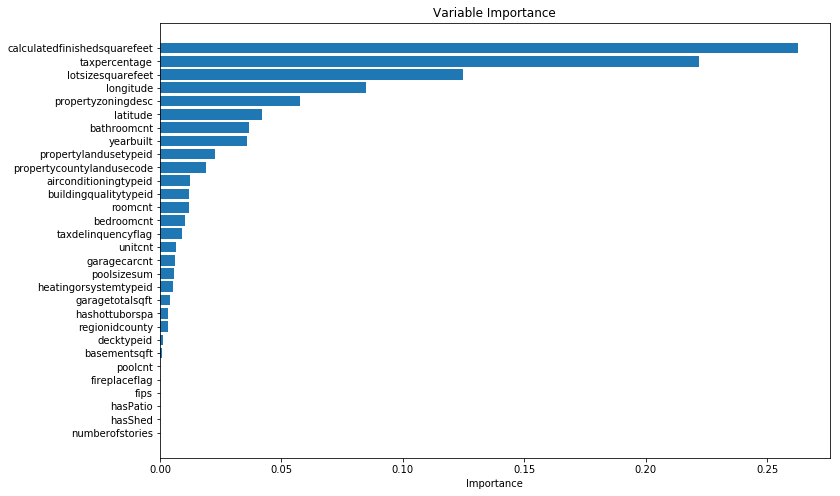

In [53]:
# Feature importance of gradient boost using the hypertuned parameters
gb_best = GradientBoostingRegressor(**gb_obj.best_params_)
gb_best.fit(X_train, y_train)
feature_importance_gb = gb_best.feature_importances_
sorted_idx = np.argsort(feature_importance_gb)

pos= np.arange(sorted_idx.shape[0]) +0.5

plt.figure(figsize=(12,8))
plt.barh(pos,feature_importance_gb[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Variable Importance')
plt.show()
